# Lesson 14: Advanced statistics demonstration

This notebook demonstrates key concepts in advanced statistics including hypothesis testing, confidence intervals, and statistical inference.

We'll explore:

**1. Confidence intervals**

- Constructing confidence intervals for sample means
- Interpreting confidence interval coverage
- Visualizing multiple confidence intervals

**2. Hypothesis testing**

- Comparing two samples with t-tests
- Understanding null and alternative hypotheses
- Interpreting p-values and significance levels

**3. Type I errors through repeated testing**

- Understanding false positive rates
- Empirically demonstrating Type I error rates
- Visualizing distributions of p-values and t-statistics

**4. Multiple testing correction**

- Controlling family-wise error rate
- Applying Bonferroni correction
- Comparing corrected and uncorrected significance levels

## Setup

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### Population distribution

Generate a large sample to represent our population and visualize its characteristics. We'll create 10,000 data points from a normal distribution with mean 100 and standard deviation 15.

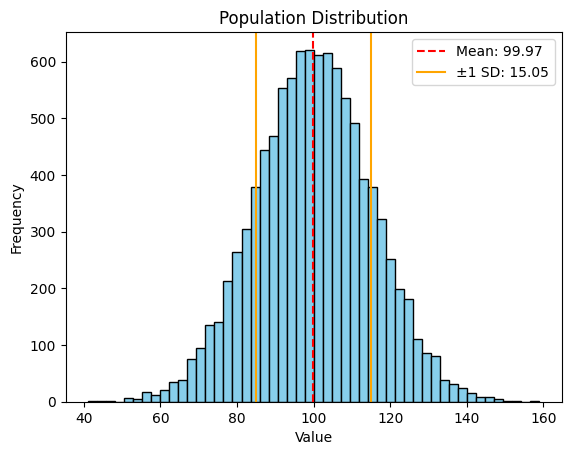

In [2]:
# Generate population data
np.random.seed(42)
population = np.random.normal(loc=100, scale=15, size=10000)

# Calculate population parameters
pop_mean = population.mean()
pop_std = population.std()

# Plot population distribution
plt.title('Population Distribution')
plt.hist(population, bins=50, edgecolor='black', color='skyblue')
plt.axvline(pop_mean, color='red', linestyle='--', label=f'Mean: {pop_mean:.2f}')
plt.axvline(pop_mean - pop_std, color='orange', label=f'±1 SD: {pop_std:.2f}')
plt.axvline(pop_mean + pop_std, color='orange')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## 1. Confidence interval for sample mean

Draw a sample of 100 observations from the population and construct a 95% confidence interval around the sample mean. The confidence interval gives us a range of plausible values for the true population mean based on our sample.

### 1.1. Construct 95% confidence interval

In [3]:
# Draw a sample of 100 data points
sample_size = 100
sample = np.random.choice(population, size=sample_size, replace=False)

# Calculate sample statistics
sample_mean = sample.mean()
sample_std = sample.std(ddof=1)
sample_se = sample_std / np.sqrt(sample_size)

In [4]:
# Construct 95% confidence interval
confidence_level = 0.95
alpha = 1 - confidence_level
df = sample_size - 1

# Use t-distribution for confidence interval
t_critical = stats.t.ppf(1 - alpha/2, df)
margin_of_error = t_critical * sample_se

ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error


In [5]:
print(f"Sample mean: {sample_mean:.2f}")
print(f"\n95% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")
print(f"Margin of error: ±{margin_of_error:.2f}")

Sample mean: 101.75

95% Confidence Interval: [98.57, 104.94]
Margin of error: ±3.19


### 1.2. Sample distribution

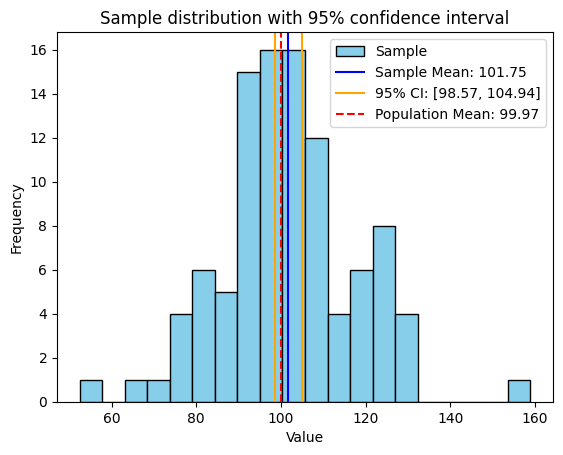

In [6]:
# Visualize the confidence interval
plt.title('Sample distribution with 95% confidence interval')
plt.hist(sample, bins=20, edgecolor='black', color='skyblue', label='Sample')
plt.axvline(sample_mean, color='blue', label=f'Sample Mean: {sample_mean:.2f}')
plt.axvline(ci_lower, color='orange', label=f'95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]')
plt.axvline(ci_upper, color='orange')
plt.axvline(pop_mean, color='red', linestyle='--', label=f'Population Mean: {pop_mean:.2f}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### 1.3. Confidence intervals with reapeated samples

In [7]:
# Draw 100 samples and calculate confidence intervals
num_samples = 100
sample_size = 100
confidence_level = 0.95
alpha = 1 - confidence_level

# Store results
ci_results = []
contains_pop_mean = []

for i in range(num_samples):
    # Draw sample
    sample = np.random.choice(population, size=sample_size, replace=False)
    
    # Calculate statistics
    sample_mean = sample.mean()
    sample_std = sample.std(ddof=1)
    sample_se = sample_std / np.sqrt(sample_size)
    
    # Calculate confidence interval
    df = sample_size - 1
    t_critical = stats.t.ppf(1 - alpha/2, df)
    margin_of_error = t_critical * sample_se
    
    ci_lower = sample_mean - margin_of_error
    ci_upper = sample_mean + margin_of_error
    
    # Check if CI contains population mean
    contains = ci_lower <= pop_mean <= ci_upper
    
    ci_results.append((ci_lower, ci_upper, sample_mean))
    contains_pop_mean.append(contains)

# Calculate coverage
coverage = sum(contains_pop_mean) / num_samples * 100

print(f"Number of CIs containing population mean: {sum(contains_pop_mean)}/{num_samples}")
print(f"Actual coverage: {coverage:.1f}%")
print(f"Expected coverage: {confidence_level*100:.0f}%")
print(f"\nInterpretation: About 95% of confidence intervals should contain the true population mean.")

Number of CIs containing population mean: 96/100
Actual coverage: 96.0%
Expected coverage: 95%

Interpretation: About 95% of confidence intervals should contain the true population mean.


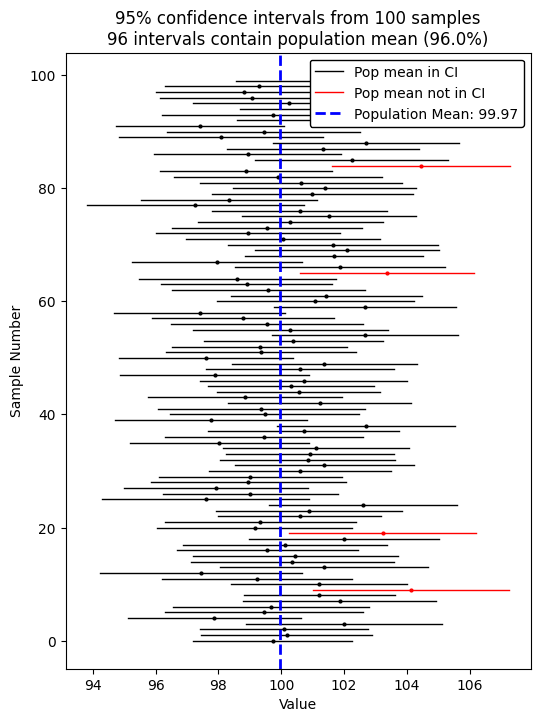

In [8]:
# Visualize the confidence intervals
plt.figure(figsize=(6, 8))

plt.title(f'95% confidence intervals from {num_samples} samples\n{sum(contains_pop_mean)} intervals contain population mean ({coverage:.1f}%)')

for i, (ci_lower, ci_upper, sample_mean) in enumerate(ci_results):

    if contains_pop_mean[i]:
        color = 'black'
        label = 'Pop mean in CI'

    else:
        color = 'red'
        label = 'Pop mean not in CI'

    plt.plot([ci_lower, ci_upper], [i, i], color=color, linewidth=1, label=label)
    plt.plot(sample_mean, i, 'o', color=color, markersize=2)

plt.axvline(pop_mean, color='blue', linestyle='--', linewidth=2, label=f'Population Mean: {pop_mean:.2f}')
plt.xlabel('Value')
plt.ylabel('Sample Number')

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
ax.legend(*zip(*unique), loc='best', framealpha=1, edgecolor='black')

plt.show()

## 2. Comparing two samples with hypothesis testing

Draw two random samples from the same population and compare their distributions. We'll use an independent samples t-test to determine if the two samples have significantly different means.

In [9]:
# Draw two samples of size 50
sample_size = 50
sample1 = np.random.choice(population, size=sample_size, replace=False)
sample2 = np.random.choice(population, size=sample_size, replace=False)

# Calculate statistics for both samples
mean1 = sample1.mean()
mean2 = sample2.mean()
std1 = sample1.std(ddof=1)
std2 = sample2.std(ddof=1)

print(f"Sample 1 - Mean: {mean1:.2f}, SD: {std1:.2f}")
print(f"Sample 2 - Mean: {mean2:.2f}, SD: {std2:.2f}")
print(f"Difference in means: {abs(mean1 - mean2):.2f}")

Sample 1 - Mean: 96.97, SD: 15.35
Sample 2 - Mean: 101.71, SD: 13.46
Difference in means: 4.75


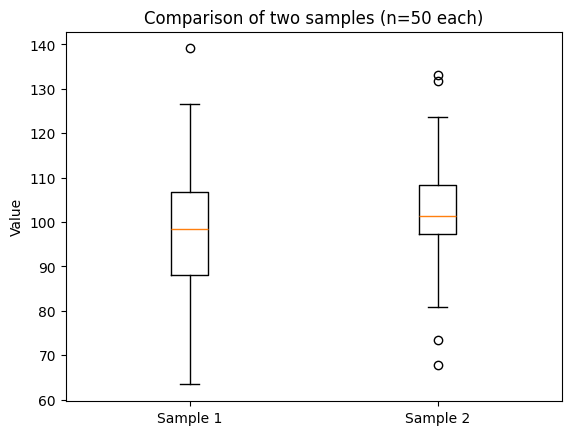

In [10]:
# Create boxplot comparison
plt.title('Comparison of two samples (n=50 each)')
plt.boxplot([sample1, sample2], tick_labels=['Sample 1', 'Sample 2'])
plt.ylabel('Value')
plt.show()

### 2.1. Hypothesis formulation

1. **Null hypothesis (H₀)**: The means of the two samples are equal (μ₁ = μ₂).
2. **Alternative hypothesis (H₁)**: The means of the two samples are different (μ₁ ≠ μ₂).

This is a two-tailed test because we're checking for any difference, not a specific direction.

### 2.2. t-test for differences in means

In [11]:
# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(sample1, sample2)

print(f"\nIndependent Samples t-test:")
print(f" - t-statistic: {t_statistic:.4f}")
print(f" - p-value: {p_value:.4f}")


Independent Samples t-test:
 - t-statistic: -1.6440
 - p-value: 0.1034


**Result**: The p-value (0.1034) is above the significance level of α = 0.05 so we do not reject the null hypothesis and conclude there is no significant difference between the two sample means.

### 2.3. Test statistic distribution

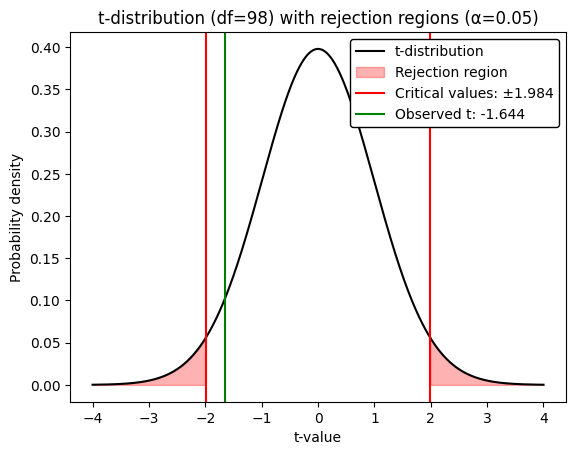

In [12]:
# Visualize t-distribution with rejection regions
df = 2 * sample_size - 2  # Degrees of freedom for two-sample t-test
t_critical = stats.t.ppf(1 - alpha/2, df)

# Generate t-distribution
t_values = np.linspace(-4, 4, 1000)
t_pdf = stats.t.pdf(t_values, df)

plt.title(f't-distribution (df={df}) with rejection regions (α={alpha:0.2f})')

plt.plot(t_values, t_pdf, color='black', label='t-distribution')

# Shade rejection regions
rejection_left = t_values[t_values <= -t_critical]
rejection_right = t_values[t_values >= t_critical]
plt.fill_between(rejection_left, stats.t.pdf(rejection_left, df), alpha=0.3, color='red', label='Rejection region')
plt.fill_between(rejection_right, stats.t.pdf(rejection_right, df), alpha=0.3, color='red')

# Mark critical values
plt.axvline(-t_critical, color='red', label=f'Critical values: ±{t_critical:.3f}')
plt.axvline(t_critical, color='red')

# Mark observed t-statistic
plt.axvline(t_statistic, color='green', label=f'Observed t: {t_statistic:.3f}')

plt.xlabel('t-value')
plt.ylabel('Probability density')
plt.legend(loc='best', framealpha=1, edgecolor='black')
plt.show()

**Decision rules**

- **Fail to reject H₀** if p-value ≥ α (evidence is not strong enough to conclude a difference exists)
- **Reject H₀** if p-value < α (evidence suggests a significant difference exists)

Since both samples are drawn from the same population, any rejection of the null hypothesis would be a Type I error.

**Type I error**

When using α = 0.05, we will incorrectly reject the null hypothesis (false positive) on average 5% of the time, even when the null hypothesis is true. This is known as a **Type I error** or false positive.

## 3. Understanding Type I errors through repeated testing

Repeat the sampling and t-test process multiple times to empirically demonstrate the Type I error rate. Since both samples come from the same population, the null hypothesis is always true, so any rejections are Type I errors (false positives).

In [13]:
num_tests = 100

### 3.1. T-test with repeated sampling

In [14]:
# Repeat sampling and t-test 100 times
sample_size = 50
alpha = 0.05

rejections = []
p_values = []
t_statistics = []

for i in range(num_tests):

    # Draw two samples from the same population
    sample1 = np.random.choice(population, size=sample_size, replace=False)
    sample2 = np.random.choice(population, size=sample_size, replace=False)
    
    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(sample1, sample2)
    t_statistics.append(t_statistic)
    p_values.append(p_value)
    
    # Check if null hypothesis is rejected
    reject = p_value < alpha
    rejections.append(reject)

# Count results
num_rejections = sum(rejections)
num_acceptances = num_tests - num_rejections

print(f'Results from {num_tests} independent t-tests:')
print(f' - Null hypothesis rejected: {num_rejections} times (incorrect conclusion)')
print(f' - Null hypothesis accepted: {num_acceptances} times (correct conclusion)')
print(f' - Errors: {num_rejections/num_tests*100:.1f}% (expected ~{alpha*100:.1f}%)')

Results from 100 independent t-tests:
 - Null hypothesis rejected: 6 times (incorrect conclusion)
 - Null hypothesis accepted: 94 times (correct conclusion)
 - Errors: 6.0% (expected ~5.0%)


### 3.2. Distribution of p-values & t-statistics

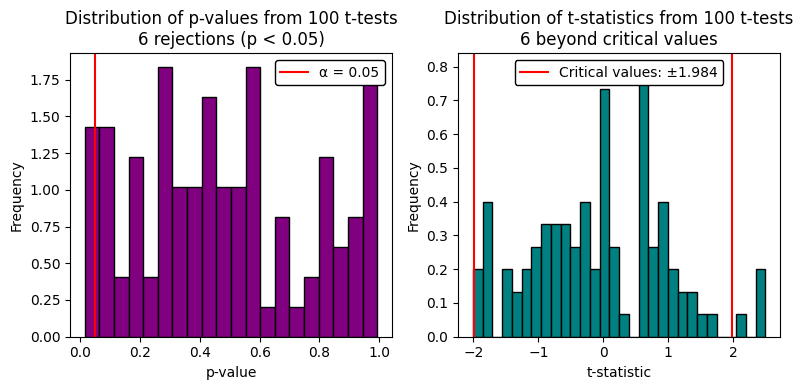

In [15]:
# Visualize the distribution of p-values and t-statistics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Plot p-values distribution
ax1.set_title(f'Distribution of p-values from {num_tests} t-tests\n{num_rejections} rejections (p < {alpha})')
ax1.hist(p_values, bins=20, density=True, edgecolor='black', color='purple')
ax1.axvline(alpha, color='red', label=f'α = {alpha}')
ax1.set_xlabel('p-value')
ax1.set_ylabel('Frequency')
ax1.legend(loc='best', framealpha=1, edgecolor='black')

# Plot t-statistics distribution
ax2.set_title(f'Distribution of t-statistics from {num_tests} t-tests\n{num_rejections} beyond critical values')
ax2.hist(t_statistics, bins=30, density=True, edgecolor='black', color='teal')
ax2.axvline(-t_critical, color='red', label=f'Critical values: ±{t_critical:.3f}')
ax2.axvline(t_critical, color='red')
ax2.set_xlabel('t-statistic')
ax2.set_ylabel('Frequency')
ax2.legend(loc='best', framealpha=1, edgecolor='black')

plt.tight_layout()
plt.show()

**Interpretation**: When conducting a large number of tests, we will falsely reject the null hypothesis approximately 5% of the time, even when it is true.

## 4. Multiple testing correction

When performing multiple hypothesis tests, the probability of making at least one Type I error increases. The Bonferroni correction adjusts the significance level to control the family-wise error rate.

**Bonferroni correction**: Divide the desired α by the number of tests.

- Original α = 0.05
- Bonferroni-corrected α = 0.05 / number of tests

This ensures the overall probability of making any Type I error across all tests remains at approximately 5%.

### 4.1. T-test with repeated sampling and Bonferroni correction

In [16]:
# Repeat sampling and t-test with Bonferroni correction
sample_size = 50
alpha = 0.05
alpha_bonferroni = alpha / num_tests  # Bonferroni correction

rejections_bonferroni = []
p_values_bonferroni = []
t_statistics_bonferroni = []

for i in range(num_tests):

    # Draw two samples from the same population
    sample1 = np.random.choice(population, size=sample_size, replace=False)
    sample2 = np.random.choice(population, size=sample_size, replace=False)
    
    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(sample1, sample2)
    t_statistics_bonferroni.append(t_statistic)
    p_values_bonferroni.append(p_value)
    
    # Check if null hypothesis is rejected using Bonferroni correction
    reject = p_value < alpha_bonferroni
    rejections_bonferroni.append(reject)

# Count results
num_rejections_bonf = sum(rejections_bonferroni)
num_acceptances_bonf = num_tests - num_rejections_bonf

print(f'Results from {num_tests} independent t-tests:')
print(f'\nBonferroni correction (α = {alpha_bonferroni:.6f}):')
print(f' - Null hypothesis rejected: {num_rejections_bonf} times')
print(f' - Null hypothesis accepted: {num_acceptances_bonf} times')
print(f' - Error rate: {num_rejections_bonf/num_tests*100:.2f}%')
print(f'\nUncorrected (α = {alpha}):')
print(f' - Expected error rate: ~{alpha*100:.1f}%')

Results from 100 independent t-tests:

Bonferroni correction (α = 0.000500):
 - Null hypothesis rejected: 0 times
 - Null hypothesis accepted: 100 times
 - Error rate: 0.00%

Uncorrected (α = 0.05):
 - Expected error rate: ~5.0%


### 4.2. Distribution of p-values and t-statistics with Bonferroni correction

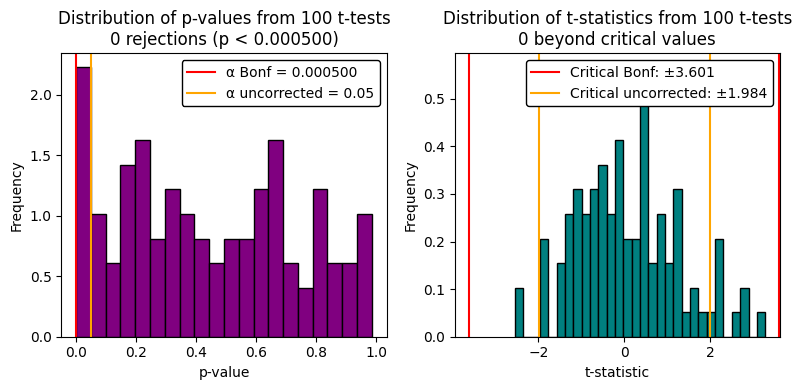

In [17]:
# Visualize the distribution of p-values and t-statistics with Bonferroni correction
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Plot p-values distribution
ax1.set_title(f'Distribution of p-values from {num_tests} t-tests\n{num_rejections_bonf} rejections (p < {alpha_bonferroni:.6f})')
ax1.hist(p_values_bonferroni, bins=20, density=True, edgecolor='black', color='purple')
ax1.axvline(alpha_bonferroni, color='red', label=f'α Bonf = {alpha_bonferroni:.6f}')
ax1.axvline(alpha, color='orange', label=f'α uncorrected = {alpha}')
ax1.set_xlabel('p-value')
ax1.set_ylabel('Frequency')
ax1.legend(loc='best', framealpha=1, edgecolor='black')

# Plot t-statistics distribution
df = 2 * sample_size - 2
t_critical = stats.t.ppf(1 - alpha/2, df)

df = 2 * sample_size - 2
t_critical_bonferroni = stats.t.ppf(1 - alpha_bonferroni/2, df)

ax2.set_title(f'Distribution of t-statistics from {num_tests} t-tests\n{num_rejections_bonf} beyond critical values')
ax2.hist(t_statistics_bonferroni, bins=30, density=True, edgecolor='black', color='teal')
ax2.axvline(-t_critical_bonferroni, color='red', label=f'Critical Bonf: ±{t_critical_bonferroni:.3f}')
ax2.axvline(t_critical_bonferroni, color='red')
ax2.axvline(-t_critical, color='orange', label=f'Critical uncorrected: ±{t_critical:.3f}')
ax2.axvline(t_critical, color='orange')
ax2.set_xlabel('t-statistic')
ax2.set_ylabel('Frequency')
ax2.legend(loc='best', framealpha=1, edgecolor='black')

plt.tight_layout()
plt.show()